### Imports 

In [ ]:
# To get the history of ALL jupyter notebook lines that have ever been written by me --> Alexander is the best omg
%history -g -f backup

In [3]:
import pandas as pd
import os
import numpy as np

from matplotlib import image as mpimg
from matplotlib import pyplot as plt 

## Match background to GT data

In [ ]:
GT_df = pd.read_csv("/media1/data/beardata/GTs/2017_heads.csv")
background_df = pd.read_csv("/media1/data/beardata/background/2017_split/2017_backgrounds.csv")

names_GT = []
names_back = []
for i in range(len(GT_df)): 
    names_GT.append(os.path.basename(GT_df.image[i]))
    names_back.append(background_df.filenames[i])


print('GT length =', len(names_GT))

d = [value for value in names_back if value in names_GT]
print("Number of equal elements (filenames) =", len(d))


In [ ]:
# fast way!
GT_df["background"] = np.nan

for i in range(len(GT_df)):
    idx = background_df.filenames.to_list().index(os.path.basename(GT_df.image[i]))
    GT_df.background[i] = background_df.background[idx]


GT_df
#final = GT_df.drop("Unnamed: 0", axis=1)


In [ ]:
#GT_df.to_csv("/media1/data/beardata/GTs/2017_heads.csv")

#### Visualization

In [ ]:
columns = 6
rows = 10
_, axs = plt.subplots(rows, columns, figsize=(20, 20))
axs = axs.flatten()
for idx, ax in zip(range(60), axs):
    img = mpimg.imread(os.path.join("/media1/data/beardata", GT_df.image[idx+4000]), 200)
    ax.set_title(GT_df.background[idx+4000], fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
plt.show()

## Visualization of the backgrounds

In [ ]:
GT_df = pd.read_csv("/media1/data/beardata/GTs/2017_heads.csv")

examples = [GT_df.image[idx] for idx in range(len(GT_df)) if GT_df.background[idx] == "water" ]
print(len(examples))

columns = 6
rows = 7
_, axs = plt.subplots(rows, columns, figsize=(20, 20))
axs = axs.flatten()
for idx, ax in zip(range(42), axs):
    img = mpimg.imread(os.path.join("/media1/data/beardata", examples[idx+500]), 200)
    ax.set_title("water", fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
plt.show()

## Background analysis

### All data (with backgrounds)

In [4]:
df_2017 = pd.read_csv("/media1/data/beardata/GTs/2017_heads.csv")
df_2018 = pd.read_csv("/media1/data/beardata/GTs/2018_heads.csv")
df_2019 = pd.read_csv("/media1/data/beardata/GTs/2019_heads.csv")
df_2020 = pd.read_csv("/media1/data/beardata/GTs/2020_heads.csv")
df_2021 = pd.read_csv("/media1/data/beardata/GTs/2021_heads.csv")

In [5]:
backgrounds = ['grass', 'fall', 'water', 'stone']
years = ['2017', '2018', '2019', '2020', '2021']

### Proportion of bears per year

grass
fall
water
stone


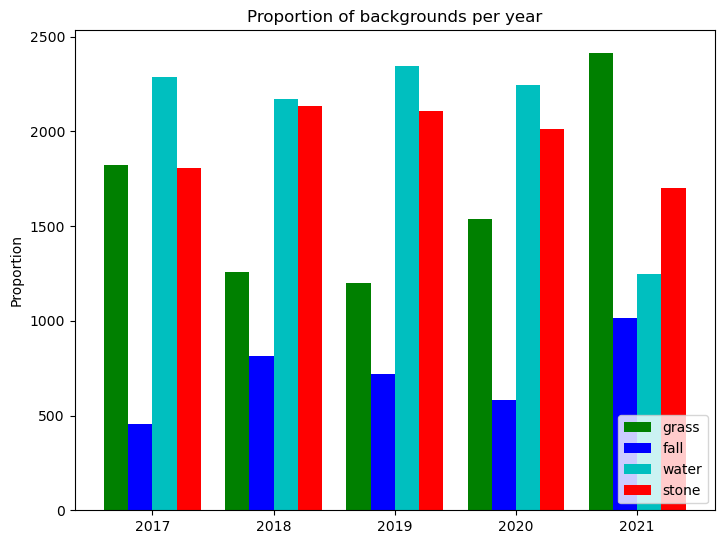

In [15]:
num_backgrounds = []
X = np.arange(5)

for background in backgrounds:
    print(background) 
    num_back_2017 = len(['hit' for i in range(len(df_2017)) if df_2017.background[i] == background])
    num_back_2018 = len(['hit' for i in range(len(df_2017)) if df_2018.background[i] == background])
    num_back_2019 = len(['hit' for i in range(len(df_2017)) if df_2019.background[i] == background])
    num_back_2020 = len(['hit' for i in range(len(df_2017)) if df_2020.background[i] == background])
    num_back_2021 = len(['hit' for i in range(len(df_2017)) if df_2021.background[i] == background])
    num_backgrounds.append([num_back_2017, num_back_2018, num_back_2019, num_back_2020, num_back_2021])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.3, num_backgrounds[0], color='g', width=0.2)
ax.bar(X - 0.1, num_backgrounds[1], color='b', width=0.2)
ax.bar(X + 0.1, num_backgrounds[2], color='c', width=0.2)
ax.bar(X + 0.3, num_backgrounds[3], color='r', width=0.2)

ax.set_xticks(X)
ax.set_xticklabels(years)

plt.legend(backgrounds, loc=4)
plt.ylabel('Proportion')
plt.title('Proportion of backgrounds per year')
plt.show()

### Number of unique bears throughout the years

In [16]:
print(f"In 2017, there were {len(np.unique(df_2017.id.to_list()))} different bears")
print(f"In 2018, there were {len(np.unique(df_2018.id.to_list()))} different bears")
print(f"In 2019, there were {len(np.unique(df_2019.id.to_list()))} different bears")
print(f"In 2020, there were {len(np.unique(df_2020.id.to_list()))} different bears")
print(f"In 2021, there were {len(np.unique(df_2021.id.to_list()))} different bears")

In 2017, there were 73 different bears
In 2018, there were 72 different bears
In 2019, there were 68 different bears
In 2020, there were 56 different bears
In 2021, there were 58 different bears


[73, 72, 68, 56, 58]


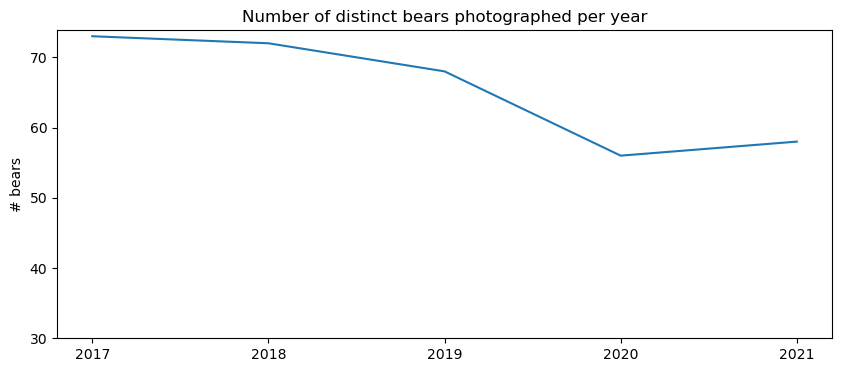

In [17]:
num_bears = [len(np.unique(df_2017.id.to_list())), len(np.unique(df_2018.id.to_list())), len(np.unique(df_2019.id.to_list())), 
             len(np.unique(df_2020.id.to_list())), len(np.unique(df_2021.id.to_list()))]
print(num_bears)
fig = plt.figure(figsize=(10,4))
plt.plot(X, num_bears)

yticks = np.arange(30, 80, 10)
plt.yticks(yticks)
plt.xticks(range(len(years)), years)
plt.ylabel('# bears')
plt.title('Number of distinct bears photographed per year')
plt.show()

### Proportions of backgrounds by months from 2017 to 2021

In [22]:
def add_months(dataframe):
    # Simply add months information to a dataframe
    full_times = dataframe.timestamp.to_list()
    dates = [full_times[i][6:len(full_times[i])-12] for i in range(len(full_times))]

    dataframe['month'] = dates
    dataframe['month'] = dataframe['month'].map({'5' : 'May', '6': 'June', '7': 'July', '8': 'August'})

In [23]:
def add_year(dataframe):
    # Simply add months information to a dataframe
    full_times = dataframe.timestamp.to_list()
    dates = [full_times[i][:4] for i in range(len(full_times))]

    dataframe['year'] = dates

In [24]:
all_df = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021], axis=0)
add_months(all_df)
add_year(all_df)
all_df

,Unnamed: 0,image,id,year,timestamp,camera,raw_image,head_pose_13,head_pose_5,width,height,width_raw,height_raw,focal_length_raw,background,month
0,0,2017_heads/images/598A0717_TG_0_Sloth.JPG,Sloth,2017,2017-07-04 10:55:03,Canon EOS 7D Mark II,2017/2017_raw/Sloth/598A0717_TG.JPG,"[[142.76953, 200.91797], [326.98828, 55.066406...","[[35.308594, 296.16797], [139.69922, 194.96484...",393,381,5472,3648,400.0,grass,July
1,1,2017_heads/images/598A6310_0_Apeman.JPG,Apeman,2017,2017-07-15 15:15:27,Canon EOS 7D Mark II,2017/2017_raw/Apeman/598A6310.JPG,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [176....","[[0, 0], [65.90625, 633.3086], [0, 0], [0, 0],...",888,1007,5472,3648,180.0,water,July
2,2,2017_heads/images/598A2551_BLR_0_Mask.JPG,Mask,2017,2017-07-08 14:17:25,Canon EOS 7D Mark II,2017/2017_raw/Mask/598A2551_BLR.JPG,"[[585.58594, 457.48828], [1362.2578, 279.2461]...","[[141.77344, 813.97266], [597.91406, 469.3711]...",1578,1521,5472,3648,400.0,water,July
3,3,2017_heads/images/598A5158_BLR_0_Queen_Bee.JPG,Queen_Bee,2017,2017-06-10 16:40:17,Canon EOS 7D Mark II,2017/2017_raw/Queen_Bee/598A5158_BLR.JPG,"[[288.79688, 531.5039], [0, 0], [283.07812, 53...","[[82.921875, 817.9883], [283.07812, 539.04297]...",732,965,5472,3648,400.0,grass,June
4,4,2017_heads/images/598A7789_BLR_0_Ian.JPG,Ian,2017,2017-06-20 14:59:33,Canon EOS 7D Mark II,2017/2017_raw/Ian/598A7789_BLR.JPG,"[[689.5, 508.4961], [0, 0], [682.5, 500.48828]...","[[689.5, 828.8086], [689.5, 492.48047], [451.5...",896,1025,5472,3648,400.0,stone,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13339,13339,2021_heads/images/P1963506_0_Point.jpg,Point,2021,2021-07-12 18:43:30,DC-G9,2021/2021_raw/Point/P1963506.JPG,"[[312.55078125, 242.67578125], [459.38671875, ...","[[241.23047, 370.8086], [316.7461, 250.4414], ...",537,497,5184,3888,318.0,grass,July
13340,13340,2021_heads/images/P2008413_0_Ian.jpg,Ian,2021,2021-07-19 14:57:45,DC-G9,2021/2021_raw/Ian/P2008413.JPG,"[[525.55078125, 508.21875], [546.43359375, 500...","[[400.2539, 822.65625], [532.5117, 508.21875],...",891,936,5184,3888,400.0,fall,July
13341,13341,2021_heads/images/P1964309_0_Sideline.jpg,Sideline,2021,2021-07-14 15:02:09,DC-G9,2021/2021_raw/Sideline/P1964309.JPG,"[[556.62890625, 726.46484375], [331.98046875, ...","[[576.59766, 726.46484], [0, 0], [446.80078, 5...",639,865,5184,3888,400.0,stone,July
13342,13342,2021_heads/images/598A9780_0_Donnie.jpg,Donnie,2021,2021-07-08 17:25:19,Canon EOS 7D Mark II,2021/2021_raw/Donnie/598A9780.JPG,"[[622.32421875, 507.8203125], [535.48828125, 8...","[[662.84766, 795.9453], [616.53516, 515.02344]...",741,922,5472,3648,400.0,stone,July


In [25]:
total_counts = all_df.groupby(['month', 'year', 'background']).size().unstack()
total_months = all_df.groupby(['month', 'background']).size().unstack().sum(axis=1)
normalized = []
for idx, row in total_counts.iterrows():
   normalized.append(row/total_months[idx[0]])

new = pd.DataFrame(normalized)
new

background       fall     grass     stone     water
August 2017       NaN  0.008365  0.021640  0.019458
       2018  0.001273  0.036007  0.026368  0.014912
       2019  0.002364  0.033279  0.117476  0.138207
       2020  0.003819  0.085470  0.101473  0.116021
       2021  0.070376  0.077469  0.076378  0.049645
July   2017  0.012563  0.015711  0.032346  0.044389
       2018  0.024606  0.023364  0.059580  0.070323
       2019  0.032172  0.029718  0.068966  0.076503
       2020  0.030613  0.043349  0.087651  0.100040
       2021  0.042714  0.083839  0.072085  0.049471
June   2017  0.001802  0.096779  0.044354  0.050310
       2018  0.000235  0.065669  0.028603  0.032443
       2019  0.006818  0.063318  0.041063  0.040984
       2020  0.013792  0.111590  0.084241  0.076640
       2021  0.015281  0.140820  0.047802  0.037458
May    2020       NaN  0.256966  0.198142  0.027864
       2021       NaN  0.077399  0.346749  0.092879

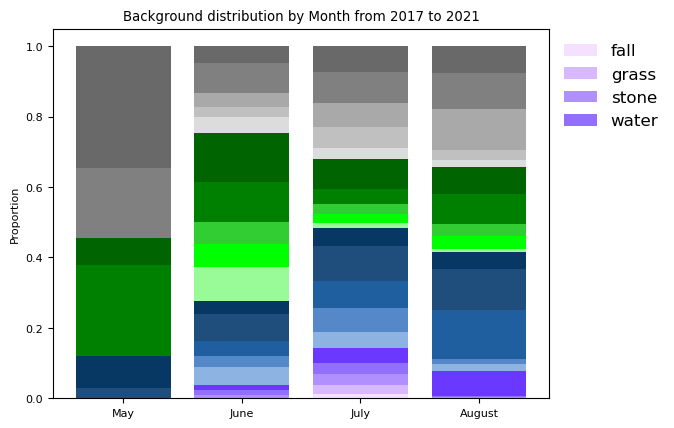

In [29]:
count_may = 0
count_june = 0
count_july = 0
count_aug = 0

violet = ['#F5E1FF', '#D8B8FF', '#B090FF', '#926FFF', '#6B38FF']
green = ['#98FB98', '#00FF00', '#32CD32', '#008000', '#006400']
#gray = ['#D3D3D3', '#A9A9A9', '#808080', '#696969', '#333333']
gray = ['gainsboro', 'silver', 'darkgray', 'gray', 'dimgrey']
blue = ['#8DB3E2', '#5588C8', '#1F5F9F', '#1F4E7C', '#073763']


colors = [violet, blue, green, gray]

plt.figure()

for i, background in enumerate(['fall', 'water', 'grass', 'stone']): 
    color = colors[i]

    for idx, row in new.iterrows():
        if idx[1] == '2017':
            icolor = 0
        if idx[1] == '2018':
            icolor = 1
        if idx[1] == '2019':
            icolor = 2
        if idx[1] == '2020':
            icolor = 3
        if idx[1] == '2021':
            icolor = 4

        if np.isnan(row[background]): 
            back = 0
        else: 
            back = row[background]        
            
        if idx[0] == 'May':
            plt.bar(idx[0], back, bottom=count_may, color=color[icolor])
            count_may += back

        if idx[0] == 'June':
            plt.bar(idx[0], back, bottom=count_june, color=color[icolor])
            count_june += back

        if idx[0] == 'July':
            plt.bar(idx[0], back, bottom=count_july, color=color[icolor])
            count_july += back

        if idx[0] == 'August':
            plt.bar(idx[0], back, bottom=count_aug, color=color[icolor])
            count_aug += back

plt.gca().invert_xaxis()
plt.legend(['fall', 'grass', 'stone', 'water'], bbox_to_anchor=(1,1), loc=2, frameon=False, fontsize=12)
plt.ylabel('Proportion')
plt.title('Background distribution by Month from 2017 to 2021')
plt.show()

5


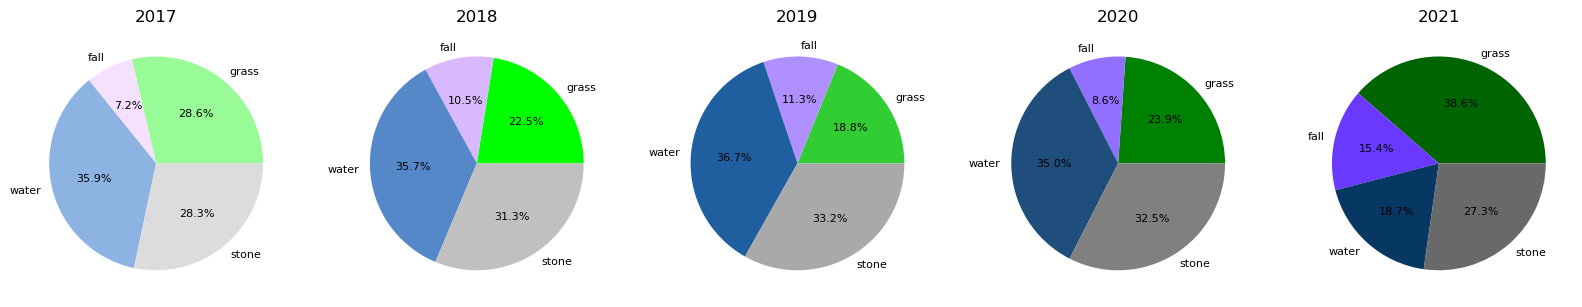

In [20]:
import seaborn as sns

backgrounds = ['grass', 'fall', 'water', 'stone']
years = ['2017', '2018', '2019', '2020', '2021'] #x-axis
X = np.arange(len(years))

num_backgrounds = [] #y-axis
for background in backgrounds: 
    num_back_2017 = len(['hit' for i in range(len(df_2017)) if df_2017.background[i] == background])/len(df_2017)
    num_back_2018 = len(['hit' for i in range(len(df_2018)) if df_2018.background[i] == background])/len(df_2018)
    num_back_2019 = len(['hit' for i in range(len(df_2019)) if df_2019.background[i] == background])/len(df_2019)
    num_back_2020 = len(['hit' for i in range(len(df_2020)) if df_2020.background[i] == background])/len(df_2020)
    num_back_2021 = len(['hit' for i in range(len(df_2021)) if df_2021.background[i] == background])/len(df_2021)
    num_backgrounds.append([num_back_2017, num_back_2018, num_back_2019, num_back_2020, num_back_2021])


pal_ = [['#98FB98', '#F5E1FF', '#8DB3E2', 'gainsboro'], 
        ['#00FF00', '#D8B8FF', '#5588C8', 'silver'],
        ['#32CD32', '#B090FF', '#1F5F9F', 'darkgray'], 
        ['#008000', '#926FFF', '#1F4E7C', 'gray'],
        ['#006400', '#6B38FF', '#073763',  'dimgrey']]
        
print(len(num_backgrounds[0]))
# Create subplots for each year
fig, axs = plt.subplots(nrows=1, ncols=len(years), figsize=(20, 5), sharey=True)

# Iterate over the years and create a scatter plot for each year
for i, year in enumerate(years):
    plt.rcParams.update({'font.size':8})
    values = [num_backgrounds[j][i] for j in range(len(backgrounds))]
    axs[i].pie(values, colors=pal_[i], labels=backgrounds, autopct='%1.1f%%')
    axs[i].set_title(f'{year}', fontsize=12)

plt.show()